In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('data/insurance.csv')

df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
# replace categorical variables with numerical using using one hot encoding
df = pd.get_dummies(df, columns=['sex', 'smoker', 'region'])    
df.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,True,False,False,True,False,False,False,True
1,18,33.770,1,1725.55230,False,True,True,False,False,False,True,False
2,28,33.000,3,4449.46200,False,True,True,False,False,False,True,False
3,33,22.705,0,21984.47061,False,True,True,False,False,True,False,False
4,32,28.880,0,3866.85520,False,True,True,False,False,True,False,False


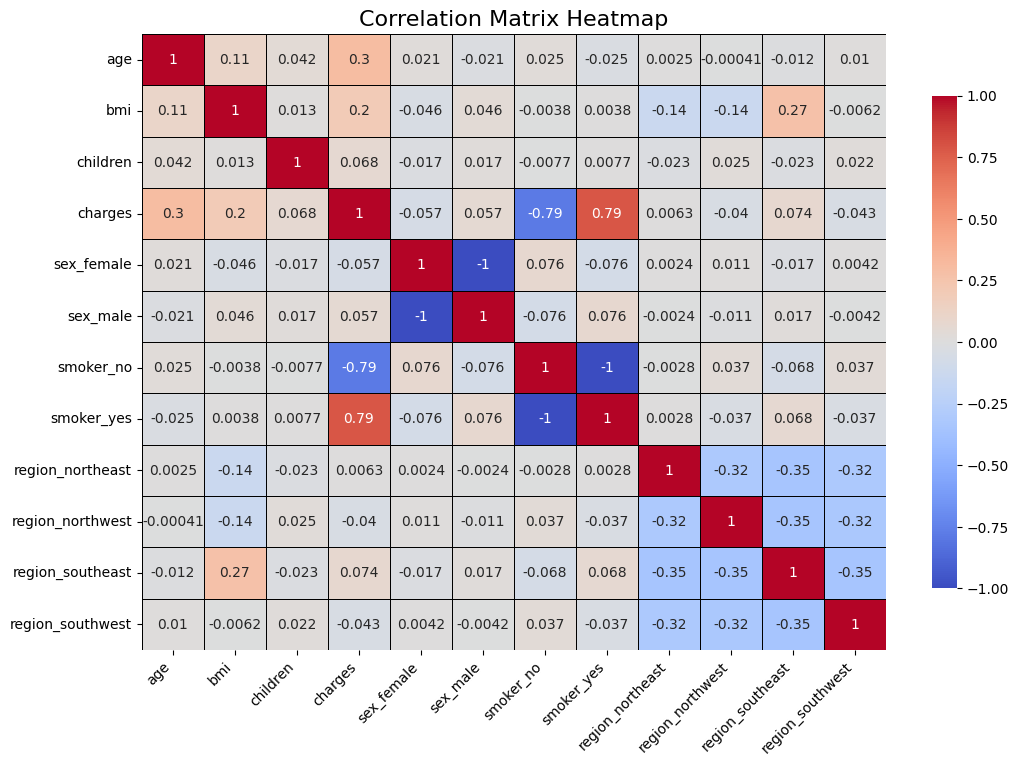

In [4]:
# correlation matrix
corr_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5, linecolor='black', cbar_kws={"shrink": .8})
plt.title('Correlation Matrix Heatmap', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.show()

# split the data into training and testing sets

- 1. use age, bmi, smoker_yes, smoker_no as features
- 2. use charges as target
- 3. split the data into training and testing sets using 80% for training and 20% for testing
- 4. use multiple linear regression to train the model
- 5. evaluate the model using the testing set


In [5]:
from sklearn.model_selection import train_test_split

# i'm going to use the following features: age, bmi, smoker_yes, smoker_no, region_northwest, region_southeast, region_southwest
features = ['age', 'bmi', 'smoker_yes', 'smoker_no', 'region_northwest', 'region_southeast', 'region_southwest']
X = df[features]
y = df['charges']

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
# use multiple linear regression
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
# evaluate the model
print(model.score(X_test, y_test))

0.780075588207359


In [7]:
# could you evaluate the model using the testing set? and print the r2 score
from sklearn.metrics import r2_score
y_pred = model.predict(X_test)
print(r2_score(y_test, y_pred))


0.780075588207359
